## Data Wrangling: Clean, Transform, Merge, Reshape

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas
import pandas as pd
np.set_printoptions(precision=4, threshold=500)
pd.options.display.max_rows = 100

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
%matplotlib inline

## Combining and merging data sets

### Database-style DataFrame merges

In [3]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df2 = DataFrame({'key': ['a', 'b', 'd'],
                 'data2': range(3)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [4]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [5]:
pd.merge(df1, df2)

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [6]:
pd.merge(df1, df2, on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [13]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df3

,data1,lkey
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [14]:
df4 = DataFrame({'rkey': ['a', 'b', 'd'],
                 'data2': range(3)})
df4

,data2,rkey
0,0,a
1,1,b
2,2,d


In [12]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [15]:
pd.merge(df1, df2, how='outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


https://pandas.pydata.org/pandas-docs/stable/merging.html<br/>
null값도 포함되었다. 

In [17]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                 'data1': range(6)})
df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                 'data2': range(5)})

In [18]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,b


In [19]:
df2

,data2,key
0,0,a
1,1,b
2,2,a
3,3,b
4,4,d


In [20]:
pd.merge(df1, df2, on='key', how='left')

,data1,key,data2
0,0,b,1.0
1,0,b,3.0
2,1,b,1.0
3,1,b,3.0
4,2,a,0.0
5,2,a,2.0
6,3,c,NaN
7,4,a,0.0
8,4,a,2.0
9,5,b,1.0


In [21]:
pd.merge(df1, df2, how='inner')

,data1,key,data2
0,0,b,1
1,0,b,3
2,1,b,1
3,1,b,3
4,5,b,1
5,5,b,3
6,2,a,0
7,2,a,2
8,4,a,0
9,4,a,2


In [24]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                  'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})
left
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})
right

,key1,key2,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


,key1,key2,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [22]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [25]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [26]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


### Merging on index

In [27]:
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                  'value': range(6)})
left1
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
right1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


,group_val
a,3.5
b,7.0


In [28]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [29]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [30]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                   'key2': [2000, 2001, 2002, 2001, 2002],
                   'data': np.arange(5.)})
lefth
righth = DataFrame(np.arange(12).reshape((6, 2)),
                   index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=['event1', 'event2'])
righth

,data,key1,key2
0,0.0,Ohio,2000
1,1.0,Ohio,2001
2,2.0,Ohio,2002
3,3.0,Nevada,2001
4,4.0,Nevada,2002


event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [31]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4,5
0,0.0,Ohio,2000,6,7
1,1.0,Ohio,2001,8,9
2,2.0,Ohio,2002,10,11
3,3.0,Nevada,2001,0,1


In [32]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4.0,5.0
0,0.0,Ohio,2000,6.0,7.0
1,1.0,Ohio,2001,8.0,9.0
2,2.0,Ohio,2002,10.0,11.0
3,3.0,Nevada,2001,0.0,1.0
4,4.0,Nevada,2002,NaN,NaN
4,NaN,Nevada,2000,2.0,3.0


In [33]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],
                 columns=['Ohio', 'Nevada'])
left2
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])
right2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [34]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [35]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [38]:
left1
right1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


,group_val
a,3.5
b,7.0


In [36]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [39]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [40]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [41]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


In [42]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],
                 columns=['Ohio', 'Nevada'])
left2
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])
right2
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


### Concatenating along an axis

In [43]:
arr = np.arange(12).reshape((3, 4))

In [44]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [45]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [49]:
s1 = Series([0, 1], index=['a', 'b'])
s1
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s2
s3 = Series([5, 6], index=['f', 'g'])
s3

a    0
b    1
dtype: int64

c    2
d    3
e    4
dtype: int64

f    5
g    6
dtype: int64

In [48]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [50]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


axis=1로 하니까 dataframe이 되었다. 

In [51]:
s4 = pd.concat([s1 * 5, s3])

In [52]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [53]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,5


In [54]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


In [55]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e', 'wow']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN
wow,NaN,NaN


In [57]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

multiple index, 계층 인덱스 

In [58]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [59]:
# Much more on the unstack function later
result.unstack()

,a,b,f,g
one,0.0,1.0,NaN,NaN
two,0.0,1.0,NaN,NaN
three,NaN,NaN,5.0,6.0


row의 인덱스를 column의 인덱스로 바꾸어 준다. 

In [60]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [61]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                columns=['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                columns=['three', 'four'])
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [62]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [63]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [64]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [65]:
df1

,a,b,c,d
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221


In [66]:
df2

,b,d,a
0,0.274992,0.228913,1.352917
1,0.886429,-2.001637,-0.371843


In [67]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,1.352917,0.274992,NaN,0.228913
4,-0.371843,0.886429,NaN,-2.001637


### Combining data with overlap

In [68]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64),
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan

In [69]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [70]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [71]:
np.where(pd.isnull(a), b, a)

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [72]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [74]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
                 'b': [np.nan, 2., np.nan, 6.],
                 'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})
df1
df2
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


1이 2를 합병한다. <br/>
같은 것이 있으면 기존것을 유지, 새로운 것이 있으면 추가한다. 

## Reshaping and pivoting

### Reshaping with hierarchical indexing

In [75]:
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [76]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

Ohio, Colorado 인덱스 레벨 0<br/>
one two three 인덱스 레벨 1

In [77]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [78]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [79]:
result.unstack(-1)

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [80]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [82]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])
s1
s2

a    0
b    1
c    2
d    3
dtype: int64

c    4
d    5
e    6
dtype: int64

In [83]:
data2 = pd.concat([s1, s2], keys=['one', 'two'])

In [84]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [85]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [86]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [87]:
result
df = DataFrame({'left': result, 'right': result + 5},
               columns=pd.Index(['left', 'right'], name='side'))
df

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [88]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [89]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### Pivoting "long" to "wide" format

In [109]:
data = pd.read_csv('ch07/macrodata.csv')
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
5,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.550,140.2,2.68,5.2,180.671,0.14,2.55
6,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.750,140.9,2.36,5.6,181.528,2.70,-0.34
7,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.840,141.1,2.29,6.3,182.287,1.21,1.08
8,1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.810,142.1,2.37,6.8,182.992,-0.40,2.77
9,1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.920,142.9,2.29,7.0,183.691,1.47,0.81


In [100]:
periods = pd.PeriodIndex(year=data.to_year, quarter=data.quarter, name='date')
periods

AttributeError: 'DataFrame' object has no attribute 'to_year'

In [110]:
data = DataFrame(data.to_records(),
                 columns=pd.Index(['realgdp', 'infl', 'unemp'], name='item'),
                 index=periods.to_timestamp('D', 'end'))
data

item,realgdp,infl,unemp
date,,,
1959-03-31,2710.349,0.00,5.8
1959-06-30,2778.801,2.34,5.1
1959-09-30,2775.488,2.74,5.3
1959-12-31,2785.204,0.27,5.6
1960-03-31,2847.699,2.31,5.2
1960-06-30,2834.390,0.14,5.2
1960-09-30,2839.022,2.70,5.6
1960-12-31,2802.616,1.21,6.3
1961-03-31,2819.264,-0.40,6.8


In [111]:
data.stack().reset_index().rename(columns={0:'value'})

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


In [112]:
ldata = data.stack().reset_index().rename(columns={0: 'value'})
wdata = ldata.pivot('date', 'item', 'value')

In [113]:
ldata[:10]
wdata

,date,item,value
0,1959-03-31,realgdp,2710.349
1,1959-03-31,infl,0.000
2,1959-03-31,unemp,5.800
3,1959-06-30,realgdp,2778.801
4,1959-06-30,infl,2.340
5,1959-06-30,unemp,5.100
6,1959-09-30,realgdp,2775.488
7,1959-09-30,infl,2.740
8,1959-09-30,unemp,5.300
9,1959-12-31,realgdp,2785.204


item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2
1960-06-30,0.14,2834.390,5.2
1960-09-30,2.70,2839.022,5.6
1960-12-31,1.21,2802.616,6.3
1961-03-31,-0.40,2819.264,6.8


In [116]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


In [117]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31,realgdp,2710.349,0.022074
1,1959-03-31,infl,0.000,-1.369179
2,1959-03-31,unemp,5.800,0.887204
3,1959-06-30,realgdp,2778.801,0.014331
4,1959-06-30,infl,2.340,-0.074155
5,1959-06-30,unemp,5.100,-0.048565
6,1959-09-30,realgdp,2775.488,1.235021
7,1959-09-30,infl,2.740,-0.433295
8,1959-09-30,unemp,5.300,1.391035
9,1959-12-31,realgdp,2785.204,0.820211


In [118]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8 -1.369179  0.022074  0.887204
1959-06-30  2.34  2778.801   5.1 -0.074155  0.014331 -0.048565
1959-09-30  2.74  2775.488   5.3 -0.433295  1.235021  1.391035
1959-12-31  0.27  2785.204   5.6 -0.247423  0.820211  0.302271
1960-03-31  2.31  2847.699   5.2 -0.942369  0.543980 -1.266383

In [106]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


In [120]:
ldata.set_index(['date', 'item'])

value    value2
date       item                        
1959-03-31 realgdp   2710.349  0.022074
           infl         0.000 -1.369179
           unemp        5.800  0.887204
1959-06-30 realgdp   2778.801  0.014331
           infl         2.340 -0.074155
           unemp        5.100 -0.048565
1959-09-30 realgdp   2775.488  1.235021
           infl         2.740 -0.433295
           unemp        5.300  1.391035
1959-12-31 realgdp   2785.204  0.820211
           infl         0.270 -0.247423
           unemp        5.600  0.302271
1960-03-31 realgdp   2847.699  0.543980
           infl         2.310 -0.942369
           unemp        5.200 -1.266383
1960-06-30 realgdp   2834.390  0.937250
           infl         0.140 -0.720102
           unemp        5.200 -1.593952
1960-09-30 realgdp   2839.022 -0.375498
           infl         2.700 -0.958704
           unemp        5.600  0.794336
1960-12-31 realgdp   2802.616 -1.605108
           infl         1.210  0.543710
           unemp        6.300  0.925166
1961-03-31 realgdp   2819.264 -1.469629
           infl        -0.400 -0.399592
           unemp        6.800  1.417343
1961-06-30 realgdp   2872.005 -0.897609
           infl         1.470  1.844805
           unemp        7.000  1.253168
1961-09-30 realgdp   2918.419 -1.490932
           infl         0.800 -0.027734
           unemp        6.800  1.375236
1961-12-31 realgdp   2977.830 -0.025208
           infl         0.800 -0.667880
           unemp        6.200 -2.868018
1962-03-31 realgdp   3031.241  0.210689
           infl         2.260  1.287155
           unemp        5.600 -0.574306
1962-06-30 realgdp   3064.709  0.495327
           infl         0.130  0.396050
           unemp        5.500  0.588798
1962-09-30 realgdp   3093.047 -1.281757
           infl         2.110  2.029923
           unemp        5.600 -0.501945
1962-12-31 realgdp   3100.563 -0.159285
           infl         0.790 -1.496216
           unemp        5.500  0.011448
1963-03-31 realgdp   3141.087  0.419446
           infl         0.530  2.051214
...                       ...       ...
2005-09-30 infl         9.140 -1.679772
           unemp        5.000  0.499993
2005-12-31 realgdp  12748.699 -1.382891
           infl         0.400  0.163755
           unemp        4.900 -1.265204
2006-03-31 realgdp  12915.938 -0.284330
           infl         2.600 -0.372904
           unemp        4.700  1.245173
2006-06-30 realgdp  12962.462 -2.237111
           infl         3.970 -0.570824
           unemp        4.700  1.371245
2006-09-30 realgdp  12965.916  1.162021
           infl        -1.580  0.606481
           unemp        4.700  0.264513
2006-12-31 realgdp  13060.679  0.351700
           infl         3.300  0.482437
           unemp        4.400 -0.084110
2007-03-31 realgdp  13099.901 -0.497843
           infl         4.580 -0.720806
           unemp        4.500 -0.165071
2007-06-30 realgdp  13203.977 -0.403435
           infl         2.750 -0.712109
           unemp        4.500  0.125107
2007-09-30 realgdp  13321.109 -0.113617
           infl         3.450 -1.353065
           unemp        4.700 -0.830972
2007-12-31 realgdp  13391.249  0.365190
           infl         6.380 -0.544736
           unemp        4.800  0.977949
2008-03-31 realgdp  13366.865 -0.256382
           infl         2.820  0.510783
           unemp        4.900  0.720283
2008-06-30 realgdp  13415.266  0.380877
           infl         8.530  1.003401
           unemp        5.400 -2.315555
2008-09-30 realgdp  13324.600  0.457246
           infl        -3.160 -0.025907
           unemp        6.000 -3.399312
2008-12-31 realgdp  13141.920 -0.974657
           infl        -8.790 -0.685312
           unemp        6.900 -0.645858
2009-03-31 realgdp  12925.410 -0.030759
           infl         0.940 -1.011517
           unemp        8.100 -0.122655
2009-06-30 realgdp  12901.504 -0.438517
           infl         3.370  1.213586
           unemp        9.200 -0.638036
2009-09-30 realgdp  1299

In [121]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8 -1.369179  0.022074  0.887204
1959-06-30  2.34  2778.801   5.1 -0.074155  0.014331 -0.048565
1959-09-30  2.74  2775.488   5.3 -0.433295  1.235021  1.391035
1959-12-31  0.27  2785.204   5.6 -0.247423  0.820211  0.302271
1960-03-31  2.31  2847.699   5.2 -0.942369  0.543980 -1.266383
1960-06-30  0.14  2834.390   5.2 -0.720102  0.937250 -1.593952
1960-09-30  2.70  2839.022   5.6 -0.958704 -0.375498  0.794336

## Data transformation

### Removing duplicates

In [128]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [129]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [130]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [131]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


In [132]:
#data.drop_duplicates(['k1', 'k2'], take_last=True)
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


### Transforming data using a function or mapping

In [133]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [135]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}
meat_to_animal

{'bacon': 'pig',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon',
 'pastrami': 'cow',
 'pulled pork': 'pig'}

In [137]:
data['food']

0          bacon
1    pulled pork
2          bacon
3       Pastrami
4    corned beef
5          Bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [139]:
data['food'].map(str.lower)

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [140]:
data['food'].map(str.lower).map(meat_to_animal)

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [142]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)

In [143]:
data['animal']

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: animal, dtype: object

In [144]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [146]:
%timeit data['food'].map(str.lower).map(meat_to_animal)

The slowest run took 4.13 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 459 µs per loop


In [145]:
%timeit data['food'].map(lambda x: meat_to_animal[x.lower()])

10000 loops, best of 3: 112 µs per loop


### Replacing values

In [147]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [149]:
data[data == -999] = np.nan

In [150]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [151]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [152]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

-999면 nan, -1000이면 0으로 

In [153]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

{key:value}로도 가능

### Renaming axis indexes

In [154]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [155]:
data.index
data.index.map(str.upper)

Index(['Ohio', 'Colorado', 'New York'], dtype='object')

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

index에 있는 값을 하나씩 (map)적용받아서 큰 알파벳으로 바꾼다

In [156]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [157]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


인덱스에 str.title 함수를 넘겨준다. <br/>
대문자로 바뀐 인덱스가 index에 assign된다. 

In [158]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


인덱스와 column에 사전형식으로 적용

In [ ]:
data.reame(index={'OHIo': 'INDIANA'})

대문자 소문자를 구분해야한다. 

In [159]:
# Always returns a reference to a DataFrame
_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


### Discretization and binning

In [171]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [172]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

총 범위는 4개라고 할 수 있다. <br/>
[18, 25] [25, 35] [35, 60] [60, 100]

In [173]:
#cats.labels
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [174]:
#cats.levels
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]]
              closed='right',
              dtype='interval[int64]')

cats는 카테코리 객체, categories는 객체안에 속성

In [175]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [176]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [177]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [MiddleAged < Senior < YoungAdult < Youth]

In [178]:
pd.value_counts(pd.cut(ages, bins, labels=group_names))

Youth         5
YoungAdult    3
MiddleAged    3
Senior        1
dtype: int64

In [179]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)
data

[(0.47, 0.69], (0.69, 0.9], (0.69, 0.9], (0.032, 0.25], (0.032, 0.25], ..., (0.69, 0.9], (0.69, 0.9], (0.47, 0.69], (0.47, 0.69], (0.032, 0.25]]
Length: 20
Categories (4, interval[float64]): [(0.032, 0.25] < (0.25, 0.47] < (0.47, 0.69] < (0.69, 0.9]]

array([ 0.6253,  0.7788,  0.8706,  0.0328,  0.1416,  0.7031,  0.3737,
        0.2089,  0.4239,  0.6534,  0.9042,  0.2132,  0.2753,  0.6935,
        0.0648,  0.8399,  0.6906,  0.486 ,  0.6653,  0.0407])

In [180]:
catal = pd.cut(data, 5)
data
catal

array([ 0.6253,  0.7788,  0.8706,  0.0328,  0.1416,  0.7031,  0.3737,
        0.2089,  0.4239,  0.6534,  0.9042,  0.2132,  0.2753,  0.6935,
        0.0648,  0.8399,  0.6906,  0.486 ,  0.6653,  0.0407])

[(0.556, 0.73], (0.73, 0.904], (0.73, 0.904], (0.0319, 0.207], (0.0319, 0.207], ..., (0.73, 0.904], (0.556, 0.73], (0.381, 0.556], (0.556, 0.73], (0.0319, 0.207]]
Length: 20
Categories (5, interval[float64]): [(0.0319, 0.207] < (0.207, 0.381] < (0.381, 0.556] < (0.556, 0.73] < (0.73, 0.904]]

In [181]:
data = np.random.randn(1000) # Normally distributed
cats = pd.qcut(data, 4) # Cut into quartiles
cats

[(0.0276, 0.718], (-0.601, 0.0276], (-3.746, -0.601], (0.718, 3.26], (0.0276, 0.718], ..., (0.718, 3.26], (-0.601, 0.0276], (0.0276, 0.718], (0.718, 3.26], (-3.746, -0.601]]
Length: 1000
Categories (4, interval[float64]): [(-3.746, -0.601] < (-0.601, 0.0276] < (0.0276, 0.718] < (0.718, 3.26]]

In [183]:
pd.value_counts(catal)

(0.556, 0.73]      6
(0.73, 0.904]      4
(0.207, 0.381]     4
(0.0319, 0.207]    4
(0.381, 0.556]     2
dtype: int64

In [182]:
pd.value_counts(cats)

(0.718, 3.26]       250
(0.0276, 0.718]     250
(-0.601, 0.0276]    250
(-3.746, -0.601]    250
dtype: int64

In [185]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])
pd.value_counts(pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]))

[(0.0276, 1.376], (-1.33, 0.0276], (-1.33, 0.0276], (1.376, 3.26], (0.0276, 1.376], ..., (1.376, 3.26], (-1.33, 0.0276], (0.0276, 1.376], (1.376, 3.26], (-3.746, -1.33]]
Length: 1000
Categories (4, interval[float64]): [(-3.746, -1.33] < (-1.33, 0.0276] < (0.0276, 1.376] < (1.376, 3.26]]

(0.0276, 1.376]    400
(-1.33, 0.0276]    400
(1.376, 3.26]      100
(-3.746, -1.33]    100
dtype: int64

### Detecting and filtering outliers

In [186]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))
data.head()
data.describe()

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570


,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [187]:
col = data[3]
col[np.abs(col) > 3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

97, 305, 400은 위치값이므로 98번째, 306번째, 401번째에 

np.abs 절대값을 리턴한다. <br/>
유니버셜 함수가 아닌데 모든 값에 적용하고 싶다면 map함수 사용하기 

In [190]:
np.abs(data) > 3
(np.abs(data)> 3).any(1)

,0,1,2,3
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
       ...  
950    False
951    False
952    False
953    False
954    False
955    False
956    False
957    False
958    False
959    False
960    False
961    False
962    False
963    False
964    False
965    False
966    False
967    False
968    False
969    False
970    False
971    False
972    False
973    False
974    False
975    False

In [188]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


any 하나라도 true가 있으면 true이다. 

In [191]:
np.abs(data)>3

,0,1,2,3
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [192]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


### Permutation and random sampling

In [193]:
df = DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

array([1, 0, 2, 3, 4])

In [194]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [195]:
df.take(sampler)

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [196]:
df.take(np.random.permutation(len(df))[:3])

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
4,16,17,18,19


In [197]:
bag = np.array([5, 7, -1, 6, 4])
sampler = np.random.randint(0, len(bag), size=10)

In [198]:
sampler

array([4, 4, 2, 2, 2, 0, 3, 0, 4, 1])

In [199]:
draws = bag.take(sampler)
draws

array([ 4,  4, -1, -1, -1,  5,  6,  5,  4,  7])

In [200]:
bag[sampler]

array([ 4,  4, -1, -1, -1,  5,  6,  5,  4,  7])

# 로또 시뮬레이션

In [209]:
loto = np.random.permutation(46)
loto

array([34, 25, 35, 37,  4, 13, 22, 11, 39, 27,  5, 21, 42,  6, 43, 33, 38,
       31, 15, 24, 40,  0, 23, 12, 10, 32,  1,  2, 30, 45, 36, 28, 20, 19,
        9,  7,  3,  8, 18, 41, 17, 29, 26, 16, 44, 14])

In [245]:
lotto = np.arange(45) + 1
lotto
sampler = np.random.randint(1, len(lotto)+1, size=6)
sampler

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

array([34, 30, 45, 44,  9, 21])

In [246]:
for i in range(0, 5):
    sampler = np.random.randint(1, len(lotto)+1, size = 6)
    sampler.sort()
    sampler

array([10, 12, 15, 24, 27, 27])

array([ 3, 13, 24, 26, 31, 44])

array([ 1, 18, 27, 30, 34, 42])

array([16, 22, 33, 35, 41, 41])

array([ 6, 20, 22, 23, 23, 43])

#### lotto 시뮬레이션 해답

In [249]:
def get_number():
    return np.sort(np.random.permutation(45)[:6] + 1)

In [241]:
#lotto_balls = np.arange(1, 46)
lottos = Series(np.arange(5))\
                .map(lambda x: np.random.permutation(45)[:6]+1)
lottos

0      [1, 37, 33, 3, 15, 36]
1     [32, 42, 26, 7, 39, 33]
2    [35, 17, 37, 32, 13, 36]
3     [28, 8, 38, 24, 32, 43]
4       [2, 10, 15, 43, 3, 9]
dtype: object

In [248]:
input_money = 20000
lotto_price = 1000
lottos = Series(np.arange(input_money/lotto_price))\
                .map(lambda x: np.sort(np.random.permutation(45)[:6]+1))
lottos

0       [3, 6, 14, 16, 30, 39]
1       [4, 5, 16, 19, 26, 37]
2        [1, 6, 7, 13, 17, 44]
3     [16, 21, 31, 34, 38, 44]
4      [6, 10, 20, 32, 34, 40]
5     [14, 17, 28, 31, 40, 42]
6        [1, 5, 8, 31, 34, 41]
7       [7, 9, 32, 40, 41, 43]
8       [3, 5, 20, 23, 38, 45]
9     [11, 22, 31, 35, 39, 40]
10      [2, 6, 23, 28, 31, 43]
11      [6, 8, 11, 27, 33, 45]
12     [5, 15, 20, 28, 30, 44]
13     [1, 10, 17, 22, 31, 34]
14     [8, 12, 26, 33, 34, 42]
15      [5, 9, 17, 40, 44, 45]
16     [5, 15, 21, 29, 30, 38]
17     [7, 13, 19, 35, 38, 45]
18       [5, 6, 7, 11, 20, 41]
19     [9, 11, 12, 15, 16, 23]
dtype: object

### Computing indicator / dummy variables

In [250]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [260]:
df[['data1']]

,data1
0,0
1,1
2,2
3,3
4,4
5,5


In [261]:
dummies = pd.get_dummies(df['key'], prefix='key')
dummies
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [263]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch02/movielens/movies.dat', sep='::', header=None,
                        names=mnames)
movies[:10]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [266]:
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))
genres
movies

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


유니언을 연산하기 위해서 set을 사용한 것!

In [267]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)
dummies

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [269]:
gen1 = movies.genres[0]; gen1
gen1.split('|')

"Animation|Children's|Comedy"

['Animation', "Children's", 'Comedy']

In [268]:
for i, gen in enumerate(movies.genres):
    dummies.loc[i, gen.split('|')] = 1

In [270]:
dummies

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [272]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.loc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [273]:
np.random.seed(12345)

In [274]:
values = np.random.rand(10)
values

array([ 0.9296,  0.3164,  0.1839,  0.2046,  0.5677,  0.5955,  0.9645,
        0.6532,  0.7489,  0.6536])

In [259]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins)).sum()

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


In [275]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


0~1사이에서 20%씩 구역을 나눠서, 수행<br/>
첫번째 데이터는 마지막 깡토에 들어갔다. 

## String manipulation

### String object methods

In [276]:
val = 'a,b,  guido'
val.split(',')

['a', 'b', '  guido']

In [277]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [278]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [279]:
'::'.join(pieces)

'a::b::guido'

In [280]:
'guido' in val

True

In [281]:
val.index(',')

1

In [282]:
val.find(':')

-1

return값이 -1이면 해당되는 것이 없ㄷ가고 판단하면 된다. 

In [283]:
val.index(':')

ValueError: substring not found

error가 뜨면 예외처리를 해준다. 

In [285]:
val.count(',')

2

In [286]:
val.replace(',', '::')

'a::b::  guido'

In [287]:
val.replace(',', '')

'ab  guido'

### Regular expressions

In [4]:
import re
text = "foo    bar\t baz  \tqux"
text.split(' ')
re.split('\s+', text)
re.findall('\s+', text)
re.findall('\w', text)
re.findall('\w+', text)

['foo', '', '', '', 'bar\t', 'baz', '', '\tqux']

['foo', 'bar', 'baz', 'qux']

['    ', '\t ', '  \t']

['f', 'o', 'o', 'b', 'a', 'r', 'b', 'a', 'z', 'q', 'u', 'x']

['foo', 'bar', 'baz', 'qux']

모듈에 스플릿 함수이다. <br/>
\s+는 whith space(공백)가 나오고, 여러번 나와도 구분해 낼 수 있다. <br/>
split('')은 공백이 두개 이상 있으면, 한번더 후속처리가 필요하다. 

In [289]:
text.split(' ')
[x.split for x in text.split(' ')]

['foo', '', '', '', 'bar\t', 'baz', '', '\tqux']

[<function str.split>,
 <function str.split>,
 <function str.split>,
 <function str.split>,
 <function str.split>,
 <function str.split>,
 <function str.split>,
 <function str.split>]

In [290]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

정규표현식 자체를 변수에다 저장해 놓는다. 이것을 compile이라고 한다. <br/>
https://wikidocs.net/4308<br/>
정규 표현식에서 사용하는 메타 문자(meta characters)에는 다음과 같은 것들이 있다.<br/>

(※ 메타 문자란 원래 그 문자가 가진 뜻이 아닌 특별한 용도로 사용되는 문자를 말한다.)<br/>

. ^ $ * + ? { } [ ] \ | ( )
정규 표현식에 위 메타 문자들이 사용되면 특별한 의미를 갖게 된다.<br/>

In [292]:
regex.findall(text)

['    ', '\t ', '  \t']

정규 표현식을 지원하는 re 모듈<br/>
re.compile 을 이용하여 정규표현식(위 예에서는 ab*)을 컴파일하고 컴파일된 패턴객체(re.compile의 결과로 리턴되는 객체 p)를 이용하여 그 이후의 작업을 수행할 것이다.

In [14]:
text = """Dave dave@google.com
Iceman@sun.ac.kr
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# if you forot the dot, would be wrong 
#pattern = r'[A-Z0-9._%+-]+@[A-Z0-9-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

***[A-Z0-9._%+-]*** 캐릭터리스틱<br/>
[A-Z0-9._%+-]+의 마지막 +는 캐릭터리스틱이 여러번 나와도 된다. <br/>
A부터 Z까지(대문자나 소문자 알파벳), 0부터 9까지(숫자),<br/>
., _, %, +, -가 한번이상 나온다. <br/>
@ 뒤에.. <br/>
[A-Z0-9.-]의 .은 snu.ac.kr의 경우에 필요하다. 
\.은 진짜 .을 표현하고 싶음. 특수한 기능에서 벗어나라는 표현. \ <br/>
IGNORECASE를 안 준다면, A - z
{2, 4} 최소 2개에서 최대 4개이다. 

In [6]:
text

'Dave dave@google.com\nIceman@sun.ac.kr\nSteve steve@gmail.com\nRob rob@gmail.com\nRyan ryan@yahoo.com\n'

In [15]:
regex.findall(text)

['dave@google.com',
 'Iceman@sun.ac.kr',
 'steve@gmail.com',
 'rob@gmail.com',
 'ryan@yahoo.com']

In [11]:
m = regex.search(text)
m
type(m)

<_sre.SRE_Match object; span=(5, 20), match='dave@google.com'>

_sre.SRE_Match

In [16]:
text[m.start():m.end()]

'dave@google.com'

In [17]:
print(regex.match(text))

None


In [19]:
print(text)
print(regex.sub('REDACTED', text))

Dave dave@google.com
Iceman@sun.ac.kr
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com

Dave REDACTED
REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [20]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [30]:
m = regex.match('wesm@bright.net')
# m = regex.search(' wesm@bright.net')
m.groups()
m.group(1)
m.group(0)

('wesm', 'bright', 'net')

'wesm'

'wesm@bright.net'

처음부터 match 이 문자열에 맞는 패턴이 나와야 한다. 

In [24]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('Iceman', 'sun.ac', 'kr'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [25]:
print(text)

Dave dave@google.com
Iceman@sun.ac.kr
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com



In [27]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Username: Iceman, Domain: sun.ac, Suffix: kr
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



In [28]:
regex = re.compile(r"""
    (?P<username>[A-Z0-9._%+-]+)
    @
    (?P<domain>[A-Z0-9.-]+)
    \.
    (?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)

In [29]:
m = regex.match('wesm@bright.net')
m.groupdict()

{'domain': 'bright', 'suffix': 'net', 'username': 'wesm'}

In [31]:
m_dict = m.groupdict()
m_dict['username']

'wesm'

# Vectorized string functions in pandas

In [34]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data
data = Series(data)
data

{'Dave': 'dave@google.com',
 'Rob': 'rob@gmail.com',
 'Steve': 'steve@gmail.com',
 'Wes': nan}

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [36]:
data.isnull()
data[data.isnull()]
data[data.notnull()]

Dave     False
Rob      False
Steve    False
Wes       True
dtype: bool

Wes    NaN
dtype: object

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
dtype: object

In [37]:
data.str.contains('gmail')

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [38]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [39]:
regex.findall(text)
#regex.findall(data)


[('dave', 'google', 'com'),
 ('Iceman', 'sun.ac', 'kr'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [43]:
#data.dtype is Series. so need to adding map
# data[:-1].map(regex.findall)
data[data.notnull()].map(regex.findall)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
dtype: object

In [46]:
df = DataFrame(data)
df

,0
Dave,dave@google.com
Rob,rob@gmail.com
Steve,steve@gmail.com
Wes,NaN


In [47]:
# dtype. dataframe have to use applymap
df[:-1].applymap(regex.findall)

,0
Dave,"[(dave, google, com)]"
Rob,"[(rob, gmail, com)]"
Steve,"[(steve, gmail, com)]"


In [48]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

In [49]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Rob      True
Steve    True
Wes       NaN
dtype: object

In [50]:
matches.str.get(1)

Dave    NaN
Rob     NaN
Steve   NaN
Wes     NaN
dtype: float64

In [51]:
matches.str[0]

Dave    NaN
Rob     NaN
Steve   NaN
Wes     NaN
dtype: float64

In [52]:
data.str[:5]

Dave     dave@
Rob      rob@g
Steve    steve
Wes        NaN
dtype: object

[question in stackoverflow]<br/>
I got confused about apply and applymap methods though. Why do we have two methods for applying a function to a DataFrame? 
<br/><br/>
[answer]<br/>
https://stackoverflow.com/a/19798528/8053385<br/>
Here is the difference between .map and .applymap

## Example: USDA Food Database

In [4]:
import json
db = json.load(open('ch07/foods-2011-10-03.json'))
len(db)

6636

In [5]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [6]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [7]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [8]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)

In [9]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [10]:
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [11]:
info['group']

0                  Dairy and Egg Products
1                  Dairy and Egg Products
2                  Dairy and Egg Products
3                  Dairy and Egg Products
4                  Dairy and Egg Products
5                  Dairy and Egg Products
6                  Dairy and Egg Products
7                  Dairy and Egg Products
8                  Dairy and Egg Products
9                  Dairy and Egg Products
10                 Dairy and Egg Products
11                 Dairy and Egg Products
12                 Dairy and Egg Products
13                 Dairy and Egg Products
14                 Dairy and Egg Products
15                 Dairy and Egg Products
16                 Dairy and Egg Products
17                 Dairy and Egg Products
18                 Dairy and Egg Products
19                 Dairy and Egg Products
20                 Dairy and Egg Products
21                 Dairy and Egg Products
22                 Dairy and Egg Products
23                 Dairy and Egg P

In [12]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

series가 된다. <br/>
오름차순 정렬에서 10개

In [13]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

db[0]['nutrients] == rec['nutrients']

In [14]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [15]:
nutrients.duplicated().sum()

14179

In [16]:
nutrients = nutrients.drop_duplicates()

In [17]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [18]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [19]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [20]:
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [25]:
len(ndata)
ndata.iloc[30000]

375176

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [30]:
ndata.nutrient[:10]

0                        Protein
1              Total lipid (fat)
2    Carbohydrate, by difference
3                            Ash
4                         Energy
5                          Water
6                         Energy
7           Fiber, total dietary
8                    Calcium, Ca
9                       Iron, Fe
Name: nutrient, dtype: object

In [31]:
ndata.nutrient == 'Protein'

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
30        False
31        False
32        False
33        False
34        False
35        False
36        False
37        False
38        False
39        False
40        False
41        False
42        False
43        False
44        False
45        False
46        False
47        False
48        False
49        False
          ...  
375126     True
375127    False
375128    False
375129    False
375130    False
375131    False
375132    False
375133    False
375134    False
375135    False
375136    False
375137  

In [32]:
ndata[ndata.nutrient == 'Protein']

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
54,Protein,Composition,g,24.90,1009,"Cheese, cheddar",Dairy and Egg Products,
134,Protein,Composition,g,24.99,1018,"Cheese, edam",Dairy and Egg Products,
205,Protein,Composition,g,14.21,1019,"Cheese, feta",Dairy and Egg Products,
276,Protein,Composition,g,24.26,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,
347,Protein,Composition,g,25.96,1029,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,
422,Protein,Composition,g,31.80,1038,"Cheese, romano",Dairy and Egg Products,
493,Protein,Composition,g,21.54,1039,"Cheese, roquefort",Dairy and Egg Products,
547,Protein,Composition,g,16.41,1048,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,
619,Protein,Composition,g,2.96,1049,"Cream, fluid, half and half",Dairy and Egg Products,


In [33]:
len(ndata[ndata.nutrient == 'Protein'])

6636

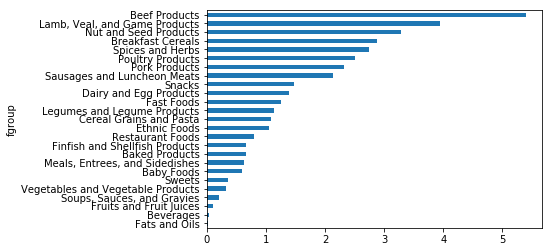

In [35]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
#result['Zinc, Zn'].order().plot(kind='barh')
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [36]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [37]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 